In [11]:
import numpy as np
import pandas as pd

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm

import scipy.stats

In [12]:
df = pd.read_csv('./pitching_data_1996_2019.csv')
df.head()

relievers = df[(df["GS"] < 3)]

In [13]:
#group by player age
relievers_age = relievers[['Age', 'G', 'GS', 'IP', 'W', 'L', 'ER', 'SV', 'SO', 'WHIP', 'BB', 'H', 'HR']].groupby(['Age'], as_index=False).sum()
relievers_age['SV_PER_G'] = relievers_age['SV'] / relievers_age['G']
relievers_age['SO_PER_G'] = relievers_age['SO'] / relievers_age['G']
relievers_age['AVG_ERA'] = 9 * (relievers_age['ER'] / relievers_age['IP'])
relievers_age['AVG_WHIP'] = (relievers_age['BB'] + relievers_age['H']) / relievers_age['IP']
relievers_age['IP_PER_G'] = relievers_age['IP'] / relievers_age['G']
relievers_age['HR_PER_G'] = relievers_age['HR'] / relievers_age['G']

relievers_age['DELTA_SV_PER_G'] = 0.0
relievers_age['PREV_SV_PER_G'] = 0.0
relievers_age['SV_PER_G_PERCENT_CHANGE'] = 0.0

relievers_age['DELTA_SO_PER_G'] = 0.0
relievers_age['PREV_SO_PER_G'] = 0.0
relievers_age['SO_PER_G_PERCENT_CHANGE'] = 0.0

relievers_age['DELTA_ERA'] = 0.0
relievers_age['PREV_ERA'] = 0.0
relievers_age['ERA_PERCENT_CHANGE'] = 0.0

relievers_age['DELTA_WHIP'] = 0.0
relievers_age['PREV_WHIP'] = 0.0
relievers_age['WHIP_PERCENT_CHANGE'] = 0.0

relievers_age['DELTA_IP_PER_G'] = 0.0
relievers_age['PREV_IP_PER_G'] = 0.0
relievers_age['IP_PER_G_PERCENT_CHANGE'] = 0.0

relievers_age['DELTA_HR_PER_G'] = 0.0
relievers_age['PREV_HR_PER_G'] = 0.0
relievers_age['HR_PER_G_PERCENT_CHANGE'] = 0.0

In [14]:
for i, r in relievers_age.iterrows():
    if i != 0:            
        relievers_age.at[i,'DELTA_SV_PER_G'] = relievers_age.at[i,'SV_PER_G'] - relievers_age.at[i-1,'SV_PER_G']
        relievers_age.at[i,'PREV_SV_PER_G'] = relievers_age.at[i-1,'SV_PER_G']
        if relievers_age.at[i,'PREV_SV_PER_G'] != 0:
            relievers_age.at[i,'SV_PER_G_PERCENT_CHANGE'] = relievers_age.at[i,'DELTA_SV_PER_G']/relievers_age.at[i,'PREV_SV_PER_G']
        
        relievers_age.at[i,'DELTA_SO_PER_G'] = relievers_age.at[i,'SO_PER_G'] - relievers_age.at[i-1,'SO_PER_G']
        relievers_age.at[i,'PREV_SO_PER_G'] = relievers_age.at[i-1,'SO_PER_G']
        relievers_age.at[i,'SO_PER_G_PERCENT_CHANGE'] = relievers_age.at[i,'DELTA_SO_PER_G']/relievers_age.at[i,'PREV_SO_PER_G']
        
        relievers_age.at[i,'DELTA_ERA'] = relievers_age.at[i,'AVG_ERA'] - relievers_age.at[i-1,'AVG_ERA']
        relievers_age.at[i,'PREV_ERA'] = relievers_age.at[i-1,'AVG_ERA']
        relievers_age.at[i,'ERA_PERCENT_CHANGE'] = relievers_age.at[i,'DELTA_ERA']/relievers_age.at[i,'PREV_ERA']
        
        relievers_age.at[i,'DELTA_WHIP'] = relievers_age.at[i,'AVG_WHIP'] - relievers_age.at[i-1,'AVG_WHIP']
        relievers_age.at[i,'PREV_WHIP'] = relievers_age.at[i-1,'AVG_WHIP']
        relievers_age.at[i,'WHIP_PERCENT_CHANGE'] = relievers_age.at[i,'DELTA_WHIP']/relievers_age.at[i,'PREV_WHIP']

        relievers_age.at[i,'DELTA_IP_PER_G'] = relievers_age.at[i,'IP_PER_G'] - relievers_age.at[i-1,'IP_PER_G']
        relievers_age.at[i,'PREV_IP_PER_G'] = relievers_age.at[i-1,'IP_PER_G']
        relievers_age.at[i,'IP_PER_G_PERCENT_CHANGE'] = relievers_age.at[i,'DELTA_IP_PER_G']/relievers_age.at[i,'PREV_IP_PER_G']
        
        relievers_age.at[i,'DELTA_HR_PER_G'] = relievers_age.at[i,'HR_PER_G'] - relievers_age.at[i-1,'HR_PER_G']
        relievers_age.at[i,'PREV_HR_PER_G'] = relievers_age.at[i-1,'HR_PER_G']
        relievers_age.at[i,'HR_PER_G_PERCENT_CHANGE'] = relievers_age.at[i,'DELTA_HR_PER_G']/relievers_age.at[i,'PREV_HR_PER_G']
        
relievers_age.head()

,Age,G,GS,IP,W,L,ER,SV,SO,WHIP,...,ERA_PERCENT_CHANGE,DELTA_WHIP,PREV_WHIP,WHIP_PERCENT_CHANGE,DELTA_IP_PER_G,PREV_IP_PER_G,IP_PER_G_PERCENT_CHANGE,DELTA_HR_PER_G,PREV_HR_PER_G,HR_PER_G_PERCENT_CHANGE
0,19,25,0,33.2,1,0,20,0,27,1.78,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,20,219,4,262.9,8,17,116,26,268,12.47,...,-0.267554,-0.506354,1.807229,-0.280183,-0.127543,1.328000,-0.096042,-0.013881,0.160000,-0.086758
2,21,1146,10,1388.7,81,61,557,115,1338,45.51,...,-0.090968,0.038507,1.300875,0.029601,0.011323,1.200457,0.009433,-0.036171,0.146119,-0.247546
3,22,3519,39,4008.8,223,177,1762,273,3903,138.52,...,0.095834,0.024368,1.339382,0.018193,-0.072593,1.211780,-0.059906,0.007415,0.109948,0.067443
4,23,7315,43,7980.8,437,393,3368,657,7501,272.77,...,-0.039861,-0.027919,1.363750,-0.020472,-0.048169,1.139187,-0.042283,-0.012100,0.117363,-0.103097


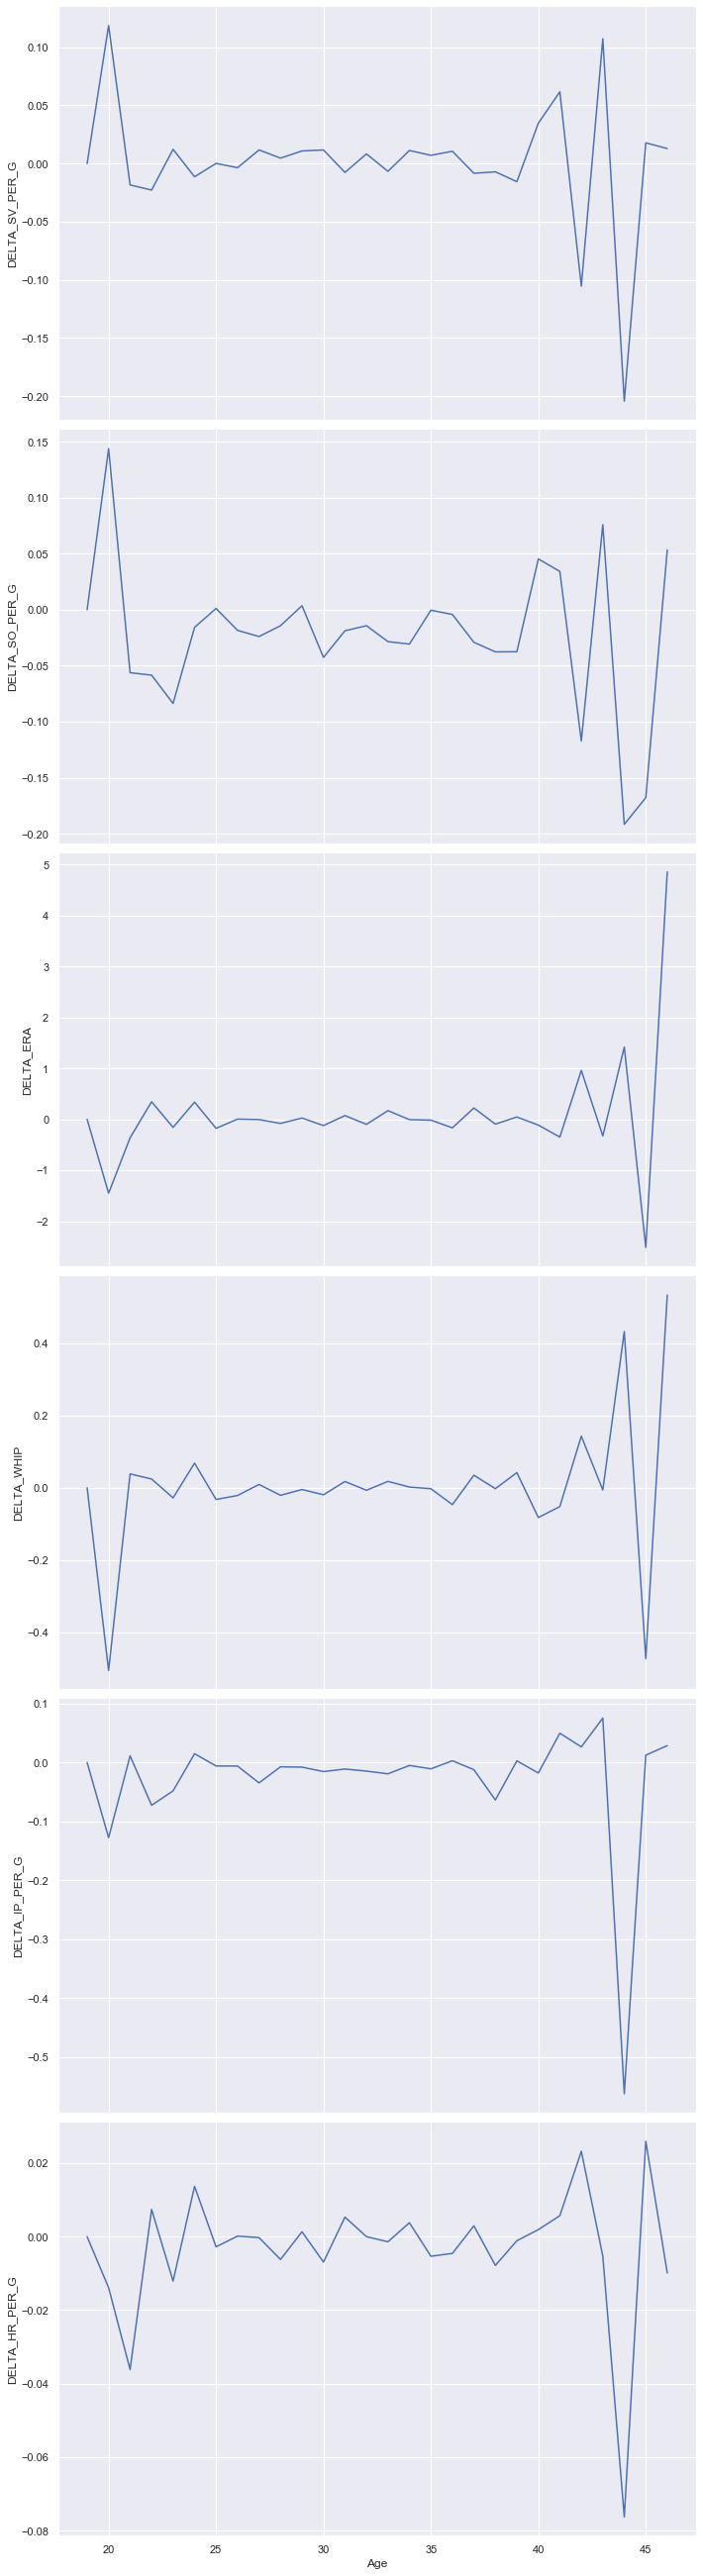

In [15]:
# explore delta of avg by age 
g = sns.PairGrid(relievers_age, y_vars=["DELTA_SV_PER_G", "DELTA_SO_PER_G","DELTA_ERA","DELTA_WHIP", "DELTA_IP_PER_G", "DELTA_HR_PER_G"], x_vars=["Age"], height=6, aspect = 1.6)
g.map(sns.lineplot, markers=True)

In [16]:
# explore percent change by age and previous season's stat
df2 = relievers[['key_mlbam', 'Age', 'G', 'GS', 'IP', 'W', 'L', 'HR', 'ERA', 'ER', 'SV', 'SO', 'WHIP', 'BB', 'H']]
df2['HR_PER_G'] = df2['HR'] / df2['G']
df2['SV_PER_G'] = df2['SV'] / df2['G']
df2['SO_PER_G'] = df2['SO'] / df2['G']
df2['IP_PER_G'] = df2['IP'] / df2['G']

df2['DELTA_SV_PER_G'] = float("NaN")
df2['PREV_SV_PER_G'] = float("NaN")
df2['SV_PER_G_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_SO_PER_G'] = float("NaN")
df2['PREV_SO_PER_G'] = float("NaN")
df2['SO_PER_G_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_ERA'] = float("NaN")
df2['PREV_ERA'] = float("NaN")
df2['ERA_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_WHIP'] = float("NaN")
df2['PREV_WHIP'] = float("NaN")
df2['WHIP_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_IP_PER_G'] = float("NaN")
df2['PREV_IP_PER_G'] = float("NaN")
df2['IP_PER_G_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_HR_PER_G'] = float("NaN")
df2['PREV_HR_PER_G'] = float("NaN")
df2['HR_PER_G_PERCENT_CHANGE'] = float("NaN")

for i, r in df2.iterrows():
    prev = df2[ (df2.key_mlbam==r.key_mlbam) & (df2['Age']==(r['Age']-1)) ]

    if len(prev)==1:        
        df2.at[i,'DELTA_SV_PER_G'] = r.SV_PER_G - prev.SV_PER_G
        df2.at[i,'PREV_SV_PER_G'] = prev.SV_PER_G
        if df2.at[i,'PREV_SV_PER_G'] != 0:
            df2.at[i,'SV_PER_G_PERCENT_CHANGE'] = df2.at[i,'DELTA_SV_PER_G']/df2.at[i,'PREV_SV_PER_G']
        else:
            df2.at[i,'SV_PER_G_PERCENT_CHANGE'] = 0.0
        
        df2.at[i,'DELTA_SO_PER_G'] = r.SO_PER_G - prev.SO_PER_G
        df2.at[i,'PREV_SO_PER_G'] = prev.SO_PER_G
        df2.at[i,'SO_PER_G_PERCENT_CHANGE'] = df2.at[i,'DELTA_SO_PER_G']/df2.at[i,'PREV_SO_PER_G']
        
        df2.at[i,'DELTA_ERA'] = r.ERA - prev.ERA
        df2.at[i,'PREV_ERA'] = prev.ERA
        df2.at[i,'ERA_PERCENT_CHANGE'] = df2.at[i,'DELTA_ERA']/df2.at[i,'PREV_ERA']
        
        df2.at[i,'DELTA_WHIP'] = r.WHIP - prev.WHIP
        df2.at[i,'PREV_WHIP'] = prev.WHIP
        df2.at[i,'WHIP_PERCENT_CHANGE'] = df2.at[i,'DELTA_WHIP']/df2.at[i,'PREV_WHIP']
        
        df2.at[i,'DELTA_IP_PER_G'] = r.IP_PER_G - prev.IP_PER_G
        df2.at[i,'PREV_IP_PER_G'] = prev.IP_PER_G
        df2.at[i,'IP_PER_G_PERCENT_CHANGE'] = df2.at[i,'DELTA_IP_PER_G']/df2.at[i,'PREV_IP_PER_G']
        
        df2.at[i,'DELTA_HR_PER_G'] = r.HR_PER_G - prev.HR_PER_G
        df2.at[i,'PREV_HR_PER_G'] = prev.HR_PER_G
        df2.at[i,'HR_PER_G_PERCENT_CHANGE'] = df2.at[i,'DELTA_HR_PER_G']/df2.at[i,'PREV_HR_PER_G']

# remove any rows where we dont have previous season data...ex: a player's first season
df2.dropna(axis=0, how='any', inplace=True)
df2.head()

/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is tr

/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in double_scalars
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,key_mlbam,Age,G,GS,IP,W,L,HR,ERA,ER,...,ERA_PERCENT_CHANGE,DELTA_WHIP,PREV_WHIP,WHIP_PERCENT_CHANGE,DELTA_IP_PER_G,PREV_IP_PER_G,IP_PER_G_PERCENT_CHANGE,DELTA_HR_PER_G,PREV_HR_PER_G,HR_PER_G_PERCENT_CHANGE
306,150378,27,77,0,82.1,2,3,2,1.20,11,...,-0.390863,-0.17,0.86,-0.197674,0.000000,1.066234,0.000000,-0.051948,0.077922,-0.666667
624,400058,27,80,0,94.2,6,5,8,1.90,20,...,-0.472222,-0.28,1.20,-0.233333,0.087756,1.089744,0.080529,0.023077,0.076923,0.300000
626,408061,22,69,0,84.0,4,1,2,1.82,17,...,-0.399340,0.01,0.99,0.010101,-0.240236,1.457627,-0.164813,-0.174404,0.203390,-0.857488
661,595014,30,68,0,80.1,9,2,2,0.78,7,...,-0.801527,-0.56,1.39,-0.402878,0.133497,1.044444,0.127816,-0.053922,0.083333,-0.647059
668,119718,28,78,0,88.2,7,7,4,1.52,15,...,-0.609254,-0.56,1.51,-0.370861,0.117071,1.013699,0.115489,-0.044608,0.095890,-0.465201


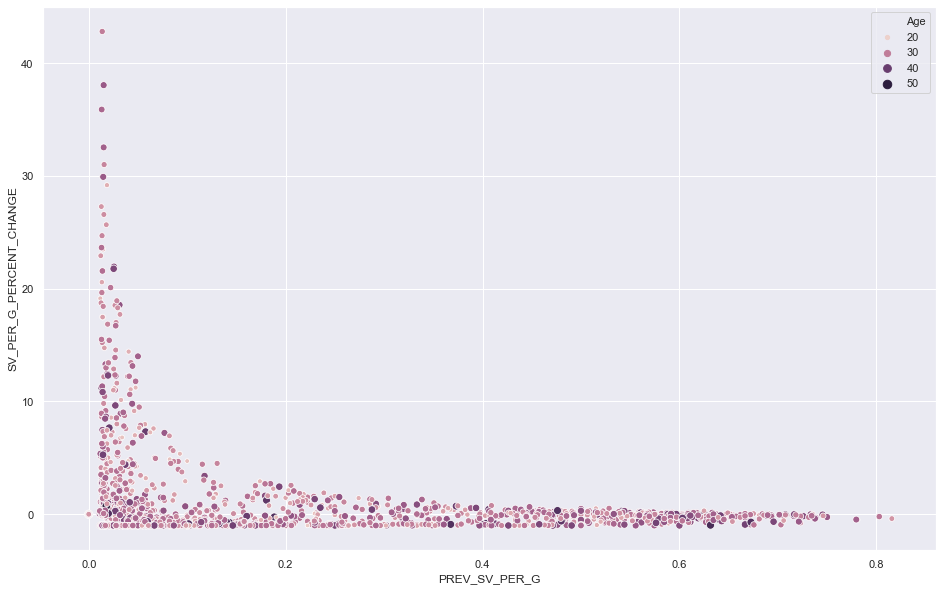

In [17]:
# explore delta of avg by age 
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_SV_PER_G", y="SV_PER_G_PERCENT_CHANGE", data=df2, size='Age', hue='Age')


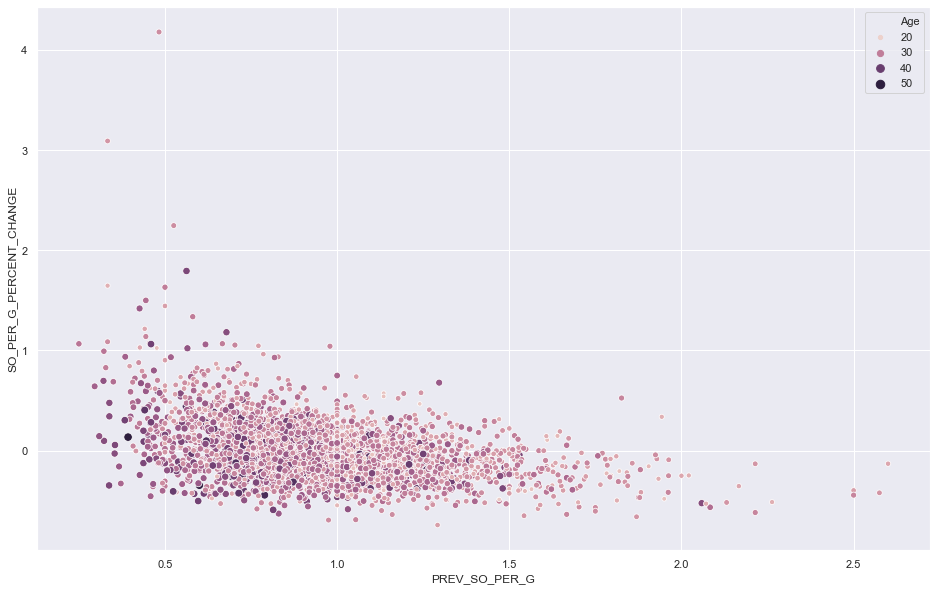

In [18]:
# explore delta of avg by age 
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_SO_PER_G", y="SO_PER_G_PERCENT_CHANGE", data=df2, size='Age', hue='Age')


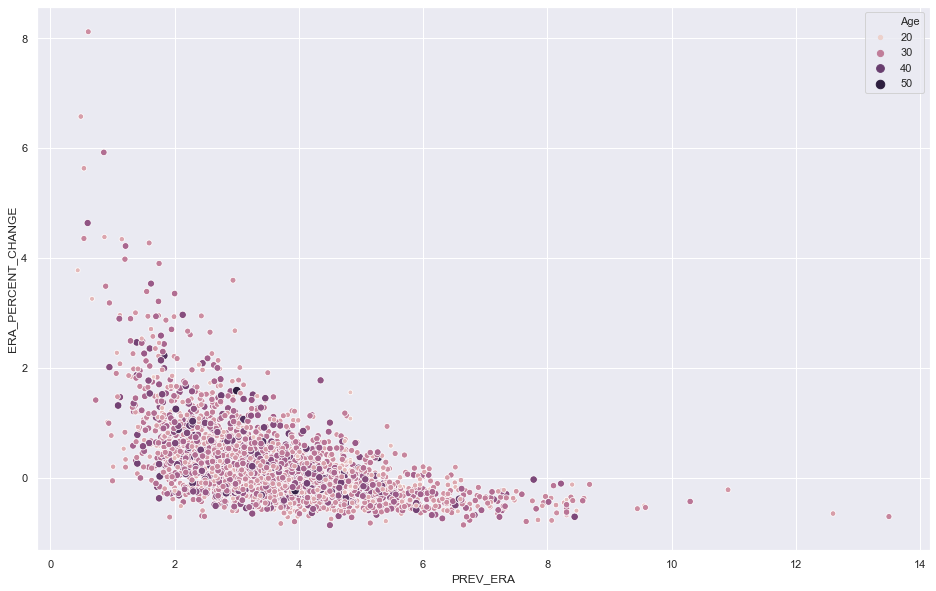

In [19]:
# explore delta of avg by age 
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_ERA", y="ERA_PERCENT_CHANGE", data=df2, size='Age', hue='Age')


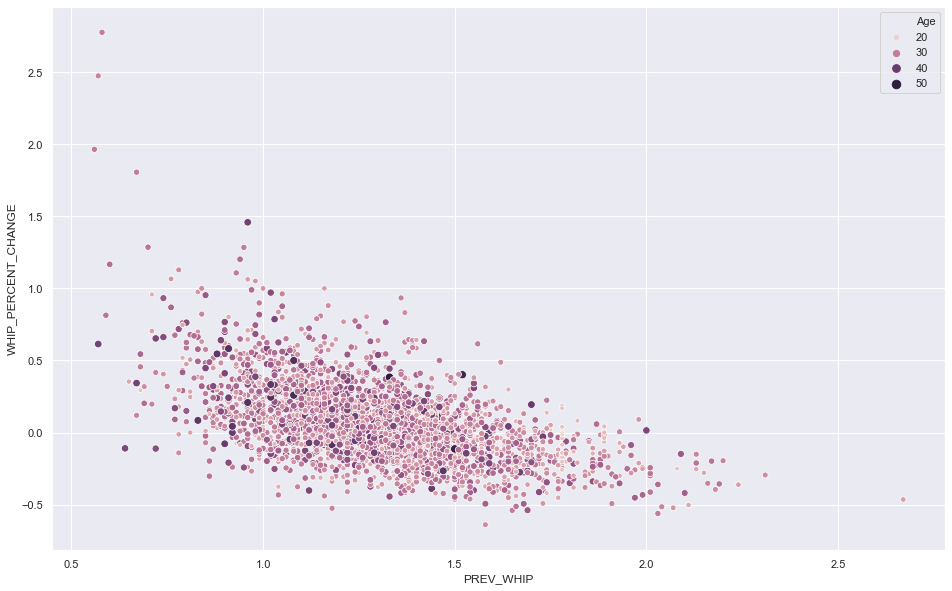

In [20]:
# explore delta of avg by age 
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_WHIP", y="WHIP_PERCENT_CHANGE", data=df2, size='Age', hue='Age')


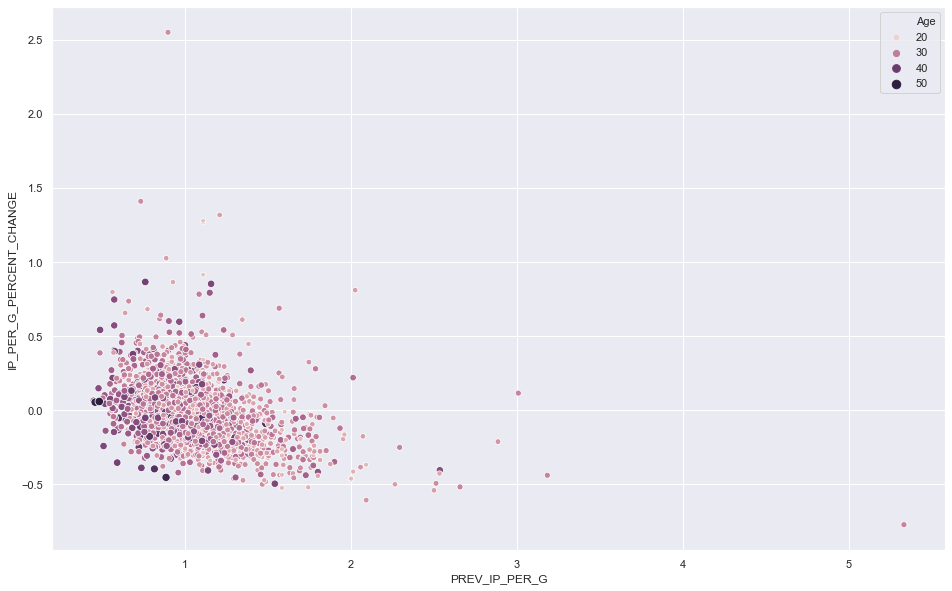

In [21]:
# explore delta of avg by age 
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_IP_PER_G", y="IP_PER_G_PERCENT_CHANGE", data=df2, size='Age', hue='Age')

In [22]:
mod_svpg = sm.ols(formula="SV_PER_G_PERCENT_CHANGE ~ Age + PREV_SV_PER_G", data=df2[df2.PREV_SV_PER_G > 0]).fit()
print(mod_svpg.summary())

mod_kpg = sm.ols(formula="SO_PER_G_PERCENT_CHANGE ~ Age + PREV_SO_PER_G", data=df2[df2.PREV_SO_PER_G > 0]).fit()
print(mod_kpg.summary())

mod_era = sm.ols(formula="ERA_PERCENT_CHANGE ~ Age + PREV_ERA", data=df2[df2.PREV_ERA > 0]).fit()
print(mod_era.summary())

mod_whip = sm.ols(formula="WHIP_PERCENT_CHANGE ~ Age + PREV_WHIP", data=df2[df2.PREV_WHIP > 0]).fit()
print(mod_whip.summary())

mod_ip_per_g = sm.ols(formula="IP_PER_G_PERCENT_CHANGE ~ Age + PREV_IP_PER_G", data=df2[df2.PREV_IP_PER_G > 0]).fit()
print(mod_ip_per_g.summary())

mod_hrpg = sm.ols(formula="HR_PER_G_PERCENT_CHANGE ~ Age + PREV_HR_PER_G", data=df2[df2.PREV_HR_PER_G > 0]).fit()
print(mod_hrpg.summary())

                               OLS Regression Results                              
Dep. Variable:     SV_PER_G_PERCENT_CHANGE   R-squared:                       0.034
Model:                                 OLS   Adj. R-squared:                  0.033
Method:                      Least Squares   F-statistic:                     32.10
Date:                     Fri, 10 Apr 2020   Prob (F-statistic):           1.99e-14
Time:                             09:44:29   Log-Likelihood:                -5118.8
No. Observations:                     1836   AIC:                         1.024e+04
Df Residuals:                         1833   BIC:                         1.026e+04
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [23]:
def determine_change_prob(stat, predicted, age, prev, data, mod):
    ## predicted_avg:  predicted batting average for upcoming season.  
    ##                 Probability of at least this batting average occuring will be returned.
    ##
    ## age:  integer value, age of player in current season
    ## prev_avg: float, previous season's batting average for player
    ## data: pandas dataframe of all observations that trained model
    ## mod: any linear regression statsmodel with a predict function that takes in a pandas dataframe
    
    percent_change = (predicted-prev)/prev
    prev_stat_name = 'PREV_{0}'.format(stat)
    
    ind = ['Age', prev_stat_name]
    row = [age, prev] 

    # create Pandas Series with defined indexes 
    x = pd.Series(row, index = ind) 

    avg_age = np.mean(data['Age'])
    # might need to change how to get previous season's batting average among all players
    avg_prev_avg = np.mean(data[prev_stat_name])
    
    model_mu = mod.predict(x)
    cov = np.cov(df2['Age'],data[prev_stat_name])[0][1]
    ## formula for model variance here https://link.springer.com/content/pdf/bbm%3A978-0-585-25657-3%2F1.pdf
    model_var = mod.params[1]**2 * np.var(data['Age']) + mod.params[2]**2 * np.var(data[prev_stat_name]) + 2*mod.params[1]*mod.params[2]*cov
    model_std = np.sqrt(model_var)
    
    if stat in ['ERA', 'WHIP', 'HR_PER_G']:
        prob = scipy.stats.norm(model_mu, model_std).cdf(percent_change)[0]
    else:
        prob = 1-scipy.stats.norm(model_mu, model_std).cdf(percent_change)[0]
        
    return prob, percent_change, predicted


In [ ]:
determine_change_prob('SV_PER_G', 0.5, 26, 0.6, df2[df2.PREV_SV_PER_G > 0], mod_svpg)

In [24]:
df2020 = pd.read_csv('./pitching_data_relievers_1996_2020.csv')
df2020.head()

,Season,Name,Team,Age,W,L,ERA,WAR,G,GS,...,BB%,E-F,RA9-WAR,BIP-Wins,LOB-Wins,FDP-Wins,K-BB%,kwERA,TTO%,key_mlbam
0,2003,Eric Gagne,Dodgers,27,2.0,3.0,1.20,4.7,77.0,0.0,...,0.065,0.35,4.4,0.6,-0.8,-0.2,0.382,0.77,0.520,150378
1,1996,Mariano Rivera,Yankees,26,8.0,3.0,2.09,4.3,61.0,0.0,...,0.080,0.21,4.5,0.4,-0.1,0.3,0.226,2.79,0.388,121250
2,2019,Liam Hendriks,Athletics,30,4.0,4.0,1.80,3.9,75.0,2.0,...,0.063,-0.07,4.2,-0.2,0.6,0.4,0.310,2.52,0.452,521230
3,2004,Brad Lidge,Astros,27,6.0,5.0,1.90,3.7,80.0,0.0,...,0.081,-0.07,4.2,0.0,0.5,0.5,0.344,1.33,0.529,400058
4,2004,Francisco Rodriguez,Angels,22,4.0,1.0,1.82,3.7,69.0,0.0,...,0.099,0.18,3.6,0.2,-0.4,-0.1,0.269,2.23,0.472,408061


In [25]:
df2020 = df2020[(df2020.Season == 2020) | (df2020.Season == 2019)]

In [27]:
df2020['prob_SV'] = float("NaN")
df2020['prob_ERA'] = float("NaN")
df2020['prob_WHIP'] = float("NaN")
df2020['prob_SO'] = float("NaN")
df2020['prob_IP'] = float("NaN")
df2020['prob_HR'] = float("NaN")

for i, r in df2020.iterrows():
    if r.Season == 2020:
        # look for previous season for player
        prev = df2020[(df2020.Season == 2019) & (df2020.key_mlbam == r.key_mlbam)]
        
        # get players age for 2020 season
        age = r.Age
        
        # get prob for SV
        prev_svpg = prev.SV.values[0] / prev.G.values[0]
        pred_svpg = r.SV / prev.G.values[0]

        prob, _, _ = determine_change_prob('SV_PER_G', pred_svpg, age, prev_svpg, df2, mod_svpg)
        
        df2020.at[i,'prob_SV'] = prob
        
        # get prob for ERA
        prev_era = prev.ERA.values[0]
        pred_era = r.ERA

        prob, _, _ = determine_change_prob('ERA', pred_era, age, prev_era, df2, mod_era)
        
        df2020.at[i,'prob_ERA'] = prob
        
        # get prob for WHIP
        prev_whip = prev.WHIP.values[0]
        pred_whip = r.WHIP

        prob, _, _ = determine_change_prob('WHIP', pred_whip, age, prev_whip, df2, mod_whip)
        
        df2020.at[i,'prob_WHIP'] = prob
        
        # get prob for SO
        prev_kpg = prev.SO.values[0] / prev.G.values[0]
        pred_kpg = r.SO / prev.G.values[0]

        prob, _, _ = determine_change_prob('SO_PER_G', pred_kpg, age, prev_kpg, df2, mod_kpg)
        
        df2020.at[i,'prob_SO'] = prob
        
        # get prob for IP
        prev_ippg = prev.IP.values[0] / prev.G.values[0]
        pred_ippg = r.IP / prev.G.values[0]

        prob, _, _ = determine_change_prob('IP_PER_G', pred_ippg, age, prev_ippg, df2, mod_ip_per_g)
        
        df2020.at[i,'prob_IP'] = prob
        
        # get prob for HR
        prev_hrpg = prev.HR.values[0] / prev.G.values[0]
        pred_hrpg = r.HR / prev.G.values[0]

        prob, _, _ = determine_change_prob('HR_PER_G', pred_hrpg, age, prev_hrpg, df2, mod_hrpg)
        
        df2020.at[i,'prob_HR'] = prob

/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [28]:
sub = df2020[(df2020.Season == 2020)]
rows_per_grp = np.floor(len(sub)/3)

sub.loc[:,'prob_SV_rank'] = sub.prob_SV.rank(ascending=False)
sub.loc[:,'prob_ERA_rank'] = sub.prob_ERA.rank(ascending=False)
sub.loc[:,'prob_WHIP_rank'] = sub.prob_WHIP.rank(ascending=False)
sub.loc[:,'prob_SO_rank'] = sub.prob_SO.rank(ascending=False)
sub.loc[:,'prob_IP_rank'] = sub.prob_IP.rank(ascending=False)
sub.loc[:,'prob_HR_rank'] = sub.prob_HR.rank(ascending=False)

sub.loc[sub.prob_SV_rank <= rows_per_grp, "prob_SV_rank_grp"] = 1
sub.loc[(sub.prob_SV_rank > rows_per_grp) & (sub.prob_SV_rank <= rows_per_grp*2), "prob_SV_rank_grp"] = 2
sub.loc[sub.prob_SV_rank > rows_per_grp*2, "prob_SV_rank_grp"] = 3

sub.loc[sub.prob_ERA_rank <= rows_per_grp, "prob_ERA_rank_grp"] = 1
sub.loc[(sub.prob_ERA_rank > rows_per_grp) & (sub.prob_ERA_rank <= rows_per_grp*2), "prob_ERA_rank_grp"] = 2
sub.loc[sub.prob_ERA_rank > rows_per_grp*2, "prob_ERA_rank_grp"] = 3

sub.loc[sub.prob_WHIP_rank <= rows_per_grp, "prob_WHIP_rank_grp"] = 1
sub.loc[(sub.prob_WHIP_rank > rows_per_grp) & (sub.prob_WHIP_rank <= rows_per_grp*2), "prob_WHIP_rank_grp"] = 2
sub.loc[sub.prob_WHIP_rank > rows_per_grp*2, "prob_WHIP_rank_grp"] = 3

sub.loc[sub.prob_SO_rank <= rows_per_grp, "prob_SO_rank_grp"] = 1
sub.loc[(sub.prob_SO_rank > rows_per_grp) & (sub.prob_SO_rank <= rows_per_grp*2), "prob_SO_rank_grp"] = 2
sub.loc[sub.prob_SO_rank > rows_per_grp*2, "prob_SO_rank_grp"] = 3

sub.loc[sub.prob_IP_rank <= rows_per_grp, "prob_IP_rank_grp"] = 1
sub.loc[(sub.prob_IP_rank > rows_per_grp) & (sub.prob_IP_rank <= rows_per_grp*2), "prob_IP_rank_grp"] = 2
sub.loc[sub.prob_IP_rank > rows_per_grp*2, "prob_IP_rank_grp"] = 3

sub.loc[sub.prob_HR_rank <= rows_per_grp, "prob_HR_rank_grp"] = 1
sub.loc[(sub.prob_HR_rank > rows_per_grp) & (sub.prob_HR_rank <= rows_per_grp*2), "prob_HR_rank_grp"] = 2
sub.loc[sub.prob_HR_rank > rows_per_grp*2, "prob_HR_rank_grp"] = 3

/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [29]:
inj = pd.read_csv('./2019_injury_mlb_api.csv')
inj.head()

inj['days_injured'] = pd.to_datetime(inj.injury_end_date) - pd.to_datetime(inj.injury_start_date)
inj.days_injured = inj.days_injured / np.timedelta64(1, 'D')

inj.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,playerid,injury_start_date,injury_end_date,days_injured
0,0,0,0,0,456501,2019-02-13T00:00:00,2019-09-10T00:00:00,209.0
1,1,1,1,1,534910,2019-02-13T00:00:00,2019-09-03T00:00:00,202.0
2,2,2,2,2,640455,2019-02-13T00:00:00,2019-09-01T00:00:00,200.0
3,3,3,3,3,608665,2019-02-13T00:00:00,2019-11-04T00:00:00,264.0
4,4,4,4,4,592836,2019-02-13T00:00:00,2019-09-29T00:00:00,228.0


In [30]:
for i, r in sub.iterrows():
    prev = inj[(inj.playerid == r.key_mlbam)]
    if len(prev) > 0:
        sub.at[i,'prev_season_days_injured'] = prev.days_injured.values[0]
    else:
        sub.at[i,'prev_season_days_injured'] = 0

/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [31]:
sub.head()

,Season,Name,Team,Age,W,L,ERA,WAR,G,GS,...,prob_SO_rank,prob_IP_rank,prob_HR_rank,prob_SV_rank_grp,prob_ERA_rank_grp,prob_WHIP_rank_grp,prob_SO_rank_grp,prob_IP_rank_grp,prob_HR_rank_grp,prev_season_days_injured
6077,2020,Blake Treinen,NaN,32,2.873498,2.504091,3.757336,NaN,NaN,NaN,...,134.0,137.0,93.0,3.0,3.0,3.0,3.0,3.0,2.0,0.0
6078,2020,Edwin Diaz,NaN,26,2.574324,2.908438,2.644896,NaN,NaN,NaN,...,105.0,80.0,54.0,2.0,3.0,3.0,2.0,2.0,1.0,0.0
6079,2020,Josh Hader,NaN,26,1.617779,3.380851,2.772890,NaN,NaN,NaN,...,121.0,72.0,46.0,2.0,3.0,3.0,3.0,2.0,1.0,0.0
6080,2020,Craig Stammen,NaN,36,2.978687,4.044900,4.034523,NaN,NaN,NaN,...,29.0,14.0,103.0,1.0,2.0,3.0,1.0,1.0,2.0,0.0
6081,2020,Felipe Vazquez,NaN,28,2.841092,3.706172,3.000421,NaN,NaN,NaN,...,104.0,102.0,138.0,2.0,2.0,3.0,2.0,2.0,3.0,0.0


In [32]:
risk_features = sub.loc[:, ['key_mlbam'
                            ,'prob_SV_rank_grp'
                            ,'prob_ERA_rank_grp'
                            ,'prob_WHIP_rank_grp'
                            ,'prob_IP_rank_grp'
                            ,'prob_HR_rank_grp'
                            ,'prob_SO_rank_grp'
                            ,'prev_season_days_injured']]

risk_features.reset_index(inplace=True,drop=True)
risk_features.head()

,key_mlbam,prob_SV_rank_grp,prob_ERA_rank_grp,prob_WHIP_rank_grp,prob_IP_rank_grp,prob_HR_rank_grp,prob_SO_rank_grp,prev_season_days_injured
0,283166,3.0,3.0,3.0,3.0,2.0,3.0,0.0
1,621242,2.0,3.0,3.0,2.0,1.0,2.0,0.0
2,623352,2.0,3.0,3.0,2.0,1.0,3.0,0.0
3,489334,1.0,2.0,3.0,1.0,2.0,1.0,0.0
4,553878,2.0,2.0,3.0,2.0,3.0,2.0,0.0


In [41]:
from sklearn.cluster import KMeans
from collections import Counter, defaultdict


kmeans = KMeans(n_clusters=3, random_state=2020).fit(risk_features.iloc[:,1:])

print(Counter(kmeans.labels_))

risk_features['overall_risk'] = 0

for i,v in enumerate(kmeans.labels_):
    
    ## re-encode such that
    ## 0 = low
    ## 1 = medium
    ## 2 = high
    
    if v == 2:
        risk = 1
    elif v == 1:
        risk = 2
    else:
        risk = v
    
    risk_features.iloc[i,8] = risk

Counter({0: 149, 2: 21, 1: 11})


In [42]:
for i,r in sub.iterrows():
    risk = risk_features[risk_features.key_mlbam == r.key_mlbam]
    risk = risk.overall_risk.values[0]
    
    sub.at[i,'overall_risk'] = risk

In [44]:
sub[sub.overall_risk == 0].Name.unique()

array(['Blake Treinen', 'Edwin Diaz', 'Josh Hader', 'Craig Stammen',
       'Felipe Vazquez', 'Will Smith', 'Adam Ottavino', 'Sean Doolittle',
       'Joakim Soria', 'Taylor Rogers', 'Jeurys Familia', 'Kirby Yates',
       'Tony Watson', 'Aroldis Chapman', 'Ryan Pressly', 'Mychal Givens',
       'Jeremy Jeffress', 'Joe Jimenez', 'Craig Kimbrel', 'Jared Hughes',
       'Richard Rodriguez', 'Hector Rondon', 'Jace Fry', 'Jose Alvarez',
       'Matt Barnes', 'Dan Winkler', 'Brad Hand', 'Seunghwan Oh',
       'David Hernandez', 'Will Harris', 'Roberto Osuna', 'Dylan Floro',
       'Steve Cishek', 'Kyle Crick', 'Oliver Perez', 'Alex Colome',
       'Pedro Strop', 'Zach Duke', 'Alex Claudio', 'Andrew Chafin',
       'Adam Kolarek', 'Pedro Baez', 'Tony Sipp', 'Wade Davis',
       'Juan Minaya', 'Brad Brach', 'Ty Buttrey', 'Aaron Bummer',
       'Ken Giles', 'Adam Cimber', 'Tanner Scott', 'Ryan Brasier',
       'Paul Fry', 'Juan Nicasio', 'Lou Trivino', 'Yusmeiro Petit',
       'Ryan Buchter', 

In [46]:
## map back to original 2020 predictions dataframe and output csv

data = pd.read_csv('./pitching_data_relievers_1996_2020.csv')

for i,r in data[data.Season==2020].iterrows():
    risk = risk_features[risk_features.key_mlbam == r.key_mlbam]
    risk = risk.overall_risk.values[0]
    
    data.at[i,'overall_risk'] = risk
    
data.tail()

,Season,Name,Team,Age,W,L,ERA,WAR,G,GS,...,E-F,RA9-WAR,BIP-Wins,LOB-Wins,FDP-Wins,K-BB%,kwERA,TTO%,key_mlbam,overall_risk
6253,2020,Austin Brice,NaN,28,2.191756,2.100514,4.225342,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,592169,0.0
6254,2020,Yimi Garcia,NaN,29,3.939010,2.230939,4.553344,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283166,0.0
6255,2020,A.J. Cole,NaN,28,2.424417,2.131721,3.810627,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,595918,1.0
6256,2020,Kyle Barraclough,NaN,30,2.153428,2.794688,3.895114,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,607457,0.0
6257,2020,Matt Albers,NaN,37,2.844117,2.340360,3.926379,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,458006,0.0


In [47]:
data.to_csv("./pitching_data_relievers_1996_2020_with_risk.csv")